# 第8章 推定問題と直交射影

In [1]:
import numpy as np
import matplotlib.pyplot as plt

#### 乱数シードの指定（テキスト掲載用）
拙著に掲載した標本を再現するため，シードを明示しておく．本来は必要ないので，コメントアウトしてよい．

In [2]:
np.random.seed(321)

## 8.1 最小二乗法

In [3]:
def SampleMean(Π):
    N = len(Π)
    if N == 0:
        return False #計算不可能
    else:
        return sum(Π)/len(Π)
    
def SampleVariance(Π):
    m=SampleMean(Π)  #標本平均
    return SampleMean( (Π-m*np.ones_like(Π))**2 )

def Cov(X,Y):
    mx = SampleMean(X)
    my = SampleMean(Y)
    return SampleMean(X*Y)-mx*my

### サンプルデータの生成

In [4]:
means = [0,1] # 期待値ベクトル
covmat = [[1,0.5],[0.5,0.3]] # 分散共分散行列
# サンプルデータ（2次元正規分布）
sample_data = np.random.multivariate_normal(means, covmat, 500)

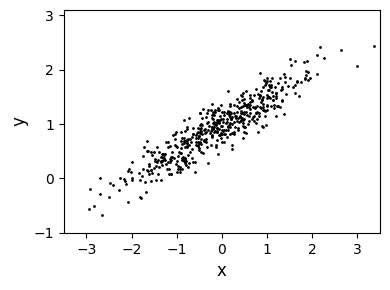

In [5]:
plt.figure(figsize=(4,3))
plt.plot(sample_data[:,0],sample_data[:,1],"k.",markersize=2)
plt.xlabel('x',fontsize=12)
plt.ylabel('y',fontsize=12)
plt.xlim([-3.5,3.5]); plt.ylim([-1,3.1]);
plt.tight_layout()
plt.savefig('figs/Ch08-1.eps')

#### サンプルデータの平均，分散，相関係数

In [6]:
mx = SampleMean(sample_data[:,0])
my = SampleMean(sample_data[:,1])
sx = np.sqrt(SampleVariance(sample_data[:,0]))
sy = np.sqrt(SampleVariance(sample_data[:,1]))
ρ= Cov(sample_data[:,0],sample_data[:,1])/(sx*sy)

### 条件付き期待値の理論計算

In [7]:
xx = np.linspace(-3.5,3.5,100)
yy = ρ*(sy/sx)*(xx-mx)+my

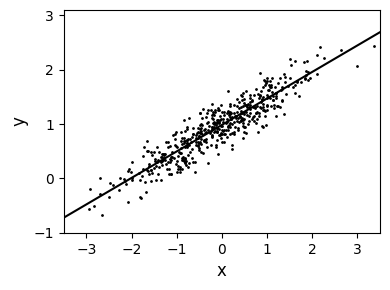

In [8]:
plt.figure(figsize=(4,3))
plt.plot(xx,yy,"k-")
plt.plot(sample_data[:,0],sample_data[:,1],"k.",markersize=2)
plt.xlim([-3.5,3.5]); plt.ylim([-1,3.1]);
plt.xlabel('x',fontsize=12)
plt.ylabel('y',fontsize=12)
plt.tight_layout()
plt.savefig('figs/Ch08-2.eps')

## 8.4 確率変数の推定

## 8.4.3 条件付き期待値との関係

### サンプルデータの生成（標本数を増やした）

In [9]:
means = [0,1] #期待値ベクトル
covmat = [[1,0.5],[0.5,0.3]] #分散共分散行列
sample_huge = np.random.multivariate_normal(means, covmat, 1000000)

mx = SampleMean(sample_huge[:,0])
my = SampleMean(sample_huge[:,1])
sx = np.sqrt(SampleVariance(sample_huge[:,0]))
sy = np.sqrt(SampleVariance(sample_huge[:,1]))
ρ= Cov(sample_huge[:,0],sample_huge[:,1])/(sx*sy)

### 条件付き期待値の理論計算

In [10]:
xx = np.linspace(-6,6,50)
yy = ρ*(sy/sx)*(xx-mx)+my

### 条件付き期待値（数値計算）

In [11]:
# x軸上にとる狭い区間の幅
eps = 0.01*(sample_huge[:,0].max() - sample_huge[:,0].min()) 

# 区間内のyの平均
def conditional_mean( data, x_val, eps ):
    x_data = data[:,0]
    y_data = data[:,1]
    indexes, = np.where( np.abs(x_data - x_val) < eps ) #xが区間に収まる点のインデックス
    extracted = y_data[indexes]
    return SampleMean(extracted)

#### 計算結果

In [12]:
xx_num = np.linspace(sample_huge[:,0].min(),sample_huge[:,0].max(),50)
yy_num = [conditional_mean(sample_huge, x, eps) for x in xx_num]

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


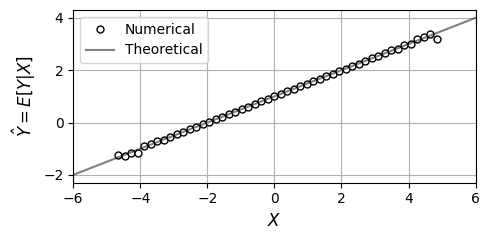

In [13]:
plt.figure(figsize=(5,2.5))
plt.plot(xx_num,yy_num, label="Numerical", markersize=5, color="w", marker="o", markeredgecolor="k" )
plt.plot(xx,yy,"k-", label="Theoretical", alpha=0.5)
plt.xlim([-6,6])
plt.xlabel('$X$',fontsize=12)
plt.ylabel('$\hat Y = E[Y|X]$',fontsize=12)
plt.legend(); plt.grid()
plt.tight_layout()
plt.savefig('figs/Ch08-CondMean.eps')

実線は理論式(算法8.3)$$\hat Y = \rho_{XY}\frac{\sigma_Y}{\sigma_X}(X - m_X) + m_Y$$のグラフ，○印は数値計算による近似値を表す．

周辺部は点が疎らなため，数値計算（○印）の精度が落ちている．